In [24]:
import pickle 
import pandas as pd 
import os
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [3]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

42997


In [4]:
file = open(r'C:\Users\Nick\Documents\GitHub\grvmodel\New Feature Creation\input_list.npy', 'rb')
inputs = pickle.load(file)

file = open(r'C:\Users\Nick\Documents\GitHub\grvmodel\New Feature Creation\classes_list.npy', 'rb')
classes = pickle.load(file)
#seperate out classes from inputs
#print(f"{[len(x) for x  in inputs]}")
inputs_length = pd.Series(data =[len(x) for x  in inputs] )
# #removing nan from inputs and convert to float
# inputs_df = pd.DataFrame(inputs)
# inputs_df.fillna(value=-1,inplace = True)
# inputs = inputs_df.values.tolist()
# inputs = [[float(i) for i in j] for j in inputs]

In [5]:

#reading data from pickle
file = open(r'C:\Users\Nick\Documents\GitHub\grvmodel\New Feature Creation\input_list.npy', 'rb')
inputs = pickle.load(file)

file = open(r'C:\Users\Nick\Documents\GitHub\grvmodel\New Feature Creation\classes_list.npy', 'rb')
classes = pickle.load(file)

data = zip(inputs,classes)
new_inputs = []
new_classes = []
for i,j in data:
    if len(i) == 32:
        new_inputs.append(i)
        new_classes.append(j)
        continue
    if len(i) ==28:
        i_new = i + [-1,-1,-1,-1]
        new_inputs.append(i_new)
        new_classes.append(j+[8])
        print(new_classes[-1])
inputs = new_inputs
classes = new_classes
#removing nan from inputs and convert to float
inputs_df = pd.DataFrame(inputs)
inputs_df.fillna(value=-1,inplace = True)
inputs = inputs_df.values.tolist()
inputs = [[float(i) for i in j] for j in inputs]

[3.0, 7.0, 1.0, 2.0, 4.0, 6.0, 5.0, 8]
[6.0, 3.0, 7.0, 4.0, 5.0, 2.0, 1.0, 8]
[1.0, 6.0, 2.0, 5.0, 3.0, 4.0, 7.0, 8]
[1.0, 5.0, 2.0, 4.0, 6.0, 3.0, 7.0, 8]
[3.0, 2.0, 1.0, 6.0, 5.0, 4.0, 7.0, 8]
[2.0, 3.0, 6.0, 1.0, 4.0, 7.0, 5.0, 8]
[4.0, 7.0, 1.0, 2.0, 6.0, 5.0, 3.0, 8]
[7.0, 4.0, 5.0, 2.0, 3.0, 1.0, 6.0, 8]
[1.0, 3.0, 6.0, 4.0, 2.0, 7.0, 5.0, 8]
[3.0, 4.0, 6.0, 2.0, 5.0, 1.0, 7.0, 8]
[2.0, 5.0, 3.0, 7.0, 4.0, 6.0, 1.0, 8]
[5.0, 2.0, 1.0, 7.0, 3.0, 6.0, 4.0, 8]
[7.0, 1.0, 6.0, 3.0, 4.0, 5.0, 2.0, 8]
[7.0, 3.0, 2.0, 4.0, 6.0, 1.0, 5.0, 8]
[7.0, 1.0, 3.0, 2.0, 6.0, 5.0, 4.0, 8]
[4.0, 2.0, 7.0, 6.0, 3.0, 1.0, 5.0, 8]
[2.0, 6.0, 5.0, 7.0, 4.0, 3.0, 1.0, 8]
[2.0, 4.0, 7.0, 6.0, 5.0, 1.0, 3.0, 8]
[4.0, 2.0, 7.0, 3.0, 5.0, 1.0, 6.0, 8]
[6.0, 4.0, 3.0, 5.0, 1.0, 7.0, 2.0, 8]
[1.0, 5.0, 4.0, 2.0, 7.0, 6.0, 3.0, 8]
[5.0, 3.0, 2.0, 7.0, 4.0, 6.0, 1.0, 8]
[6.0, 4.0, 3.0, 2.0, 7.0, 5.0, 1.0, 8]
[7.0, 6.0, 5.0, 1.0, 4.0, 3.0, 2.0, 8]
[3.0, 7.0, 5.0, 6.0, 2.0, 1.0, 4.0, 8]
[7.0, 5.0, 4.0, 1.0, 3.0,

In [6]:
#len(new_inputs)
len(inputs)

42997

In [7]:
inputs_length = pd.Series(data =[len(x) for x  in new_inputs] )
inputs_length.value_counts()

32    42997
dtype: int64

In [9]:
#these are fine
def train(net):
    BATCH_SIZE = 100
    EPOCHS = 1000
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.05)

    for epoch in tqdm.tqdm(range(EPOCHS)):
        for i in range(0, len(train_X), BATCH_SIZE): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE]
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            net.zero_grad()
            
            m = nn.LogSoftmax(dim = 1)
            outputs = m(net(batch_X))
            loss = loss_function(outputs, batch_y.float())
            loss.backward()
            optimizer.step()    # Does the update



        #print(f"Epoch: {epoch}. Loss: {loss}")
        #test(net)
        if (epoch%100 == 0):
            print(f"Epoch: {epoch}. Loss: {loss}")
            test(net)
            
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm.tqdm(range(len(test_X))):
            #print("test_y[i] \n", test_y[i], "\noutput y =", net(test_X[i]))
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i]).to(device)  # returns a list, 
            #print(net_out)
            predicted_class = torch.argmax(net_out)
            #print("predicted_class = ", predicted_class,"\nreal class = ", real_class)
            
            #print(predicted_class)
            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))

In [10]:
#Defines and initiates class

REBUILD_DATA = True

class GRV():
    #class to store training data
    
    #reading data from pickle
    file = open(r'C:\Users\Nick\Documents\GitHub\grvmodel\New Feature Creation\input_list.npy', 'rb')
    inputs_o = pickle.load(file)

    file = open(r'C:\Users\Nick\Documents\GitHub\grvmodel\New Feature Creation\classes_list.npy', 'rb')
    classes_o = pickle.load(file)

    data = zip(inputs_o,classes_o)
    new_inputs = []
    new_classes = []
    for i,j in data:
        if len(i) == 32:
            new_inputs.append(i)
            new_classes.append(j)
            continue
        if len(i) ==28:
            i_new = i + [-1,-1,-1,-1]
            new_inputs.append(i_new)
            new_classes.append(j+[8])
    inputs = new_inputs
    classes = new_classes
    #removing nan from inputs and convert to float
    inputs_df = pd.DataFrame(inputs)
    inputs_df.fillna(value=-1,inplace = True)
    inputs = inputs_df.values.tolist()
    inputs = [[float(i) for i in j] for j in inputs]
    
    
    
    #data
    training_data = []

    def make_training_data(self):
        excluded = 0
        print(len(inputs))
        for i in range(len(inputs)):
            if len(classes[i]) in [7,8]:
                self.training_data.append([np.array(inputs[i]),np.array(classes[i])])
            else:
                print(f"{len(classes[i])=}")
                excluded += 1
        np.save('training_data.npy', self.training_data)
        print("excluded = ", excluded)
        
if REBUILD_DATA:
    grv = GRV()
    grv.make_training_data()

42997


C:\Users\Nick\.conda\envs\pytorch\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


excluded =  0


In [11]:
#defines nueral net
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 8)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
net = Net().to(device)
print(net)    

Net(
  (fc1): Linear(in_features=32, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=8, bias=True)
)


In [12]:
#define tensors

X = torch.Tensor([i[0] for i in training_data])
Y = torch.Tensor([i[1] for i in training_data])
#Generate winner only class
Y_w = []
for i in Y:
    n = np.zeros(8)
    index = torch.argmin(i)
    n[index] = float(1)
    Y_w.append(n)
    
Y_w = torch.tensor([i for i in Y_w])

#trying with full place data --- REMOVE --- 
#Y_w = Y
#Traning / Val split    
VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT)
print(val_size)
train_X = X[:-val_size]
train_y = Y_w[:-val_size]

test_X = X[-val_size:]
test_y = Y_w[-val_size:]
print(len(train_X), len(test_X))

test_X = test_X.to(device)
test_y = test_y.to(device)
    
a = test_X[1]
train_y

4299
38698 4299


tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]], dtype=torch.float64)

In [15]:
#indexed win only
Y_wi = []
for i in Y:
    #print(torch.argmin(i))
    Y_wi.append(torch.argmin(i))
Y_wi = torch.tensor(Y_wi)
print(Y_wi)

tensor([1, 1, 3,  ..., 2, 2, 5])


In [11]:
indexed_win = pd.Series(Y_wi)
indexed_win.value_counts()

5    6350
6    6215
4    5916
3    5609
2    5278
1    5047
0    4428
7    4154
dtype: int64

In [ ]:
#Generates places not used currently
Y_p = []
for i in Y:
    place = [x*x for x in i]
    Y_p.append(place)
    
Y_p[1]

In [13]:
#validating model is new
for (i,j) in net.named_parameters():
    print(i,j)

fc1.weight Parameter containing:
tensor([[-0.1033,  0.1006,  0.0068,  ...,  0.0874,  0.0233,  0.0661],
        [-0.0638, -0.1225,  0.1056,  ...,  0.0735, -0.1118,  0.0467],
        [ 0.0317, -0.0411,  0.0740,  ...,  0.0028,  0.1184, -0.1052],
        ...,
        [ 0.1325, -0.0422, -0.0116,  ..., -0.1079, -0.1746, -0.1422],
        [ 0.1093,  0.1269,  0.1142,  ...,  0.1220, -0.1299, -0.1091],
        [-0.0572,  0.0624,  0.0107,  ...,  0.0985, -0.1291, -0.1338]],
       device='cuda:0', requires_grad=True)
fc1.bias Parameter containing:
tensor([ 0.1689,  0.0604, -0.1112,  0.1220,  0.1344, -0.0399,  0.0020,  0.0852,
        -0.1041, -0.0962, -0.1382, -0.0408, -0.0044,  0.0339,  0.0147, -0.1573,
        -0.1527,  0.0408,  0.0042,  0.1452, -0.0790,  0.1290, -0.0287, -0.1624,
        -0.1279,  0.0946, -0.0952,  0.1222,  0.0991, -0.1195,  0.1023,  0.0104,
        -0.0987,  0.0220,  0.0262, -0.1750, -0.1249,  0.1017,  0.1284,  0.1384,
         0.0449, -0.0727, -0.1158, -0.0948,  0.0855, -0.12

In [18]:
#utalized Win only class, not usefull for ranking placement

def train(net):
    BATCH_SIZE = 100
    EPOCHS = 500
    optimizer = optim.Adam(net.parameters(), lr=0.0001)
    loss_func = nn.MSELoss()
    for epoch in tqdm.tqdm(range(EPOCHS)):
        for i in range(0, len(train_X), BATCH_SIZE): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE]
            batch_y = train_y[i:i+BATCH_SIZE]

            #print(batch_X, batch_y)

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            net.zero_grad()
            optimizer.zero_grad()
            m = nn.LogSoftmax(dim = 1)
            outputs = net(batch_X)
            loss = loss_func(outputs, batch_y.float())
            loss.backward()
            optimizer.step()    # Does the update



        #print(f"Epoch: {epoch}. Loss: {loss}")
        #test(net)
        if (epoch%10 == 0):
            print(f"Epoch: {epoch}. Loss: {loss}")
            correct = 0
            total = 0
            with torch.no_grad():
                for i in tqdm.tqdm(range(len(test_X))):
                    real_class = torch.argmax(test_y[i])
                    net_out = net(test_X)[i] # returns a list, 
                    predicted_class = torch.argmax(net_out)
                    if predicted_class == real_class:
                        idx = int(predicted_class)*4-3
                        #print(predicted_class,net_out, test_X[i][idx])
                        correct += 1

                    total += 1
            print("Accuracy: ", round(correct/total, 3))
            print(f"{correct=}")

In [19]:
train(net)

  0%|          | 0/500 [00:00<?, ?it/s]


Epoch: 0. Loss: 4.9680914878845215


  0%|          | 1/500 [00:02<17:58,  2.16s/it]

Accuracy:  0.167
correct=718


  2%|▏         | 10/500 [00:06<04:27,  1.83it/s]


Epoch: 10. Loss: 4.96806526184082


  2%|▏         | 11/500 [00:08<07:54,  1.03it/s]

Accuracy:  0.167
correct=719


  4%|▍         | 20/500 [00:13<04:20,  1.84it/s]


Epoch: 20. Loss: 4.968040466308594


  4%|▍         | 21/500 [00:15<07:43,  1.03it/s]

Accuracy:  0.169
correct=726


  6%|▌         | 30/500 [00:20<04:15,  1.84it/s]


Epoch: 30. Loss: 4.968042373657227


  6%|▌         | 31/500 [00:22<07:29,  1.04it/s]

Accuracy:  0.172
correct=740


  8%|▊         | 40/500 [00:26<04:04,  1.88it/s]

Epoch: 40. Loss: 4.968076229095459


  8%|▊         | 41/500 [00:28<07:15,  1.05it/s]

Accuracy:  0.171
correct=734


 10%|█         | 50/500 [00:33<04:01,  1.87it/s]

Epoch: 50. Loss: 4.968085765838623


 10%|█         | 51/500 [00:35<07:07,  1.05it/s]

Accuracy:  0.171
correct=736


 12%|█▏        | 60/500 [00:40<04:01,  1.82it/s]

Epoch: 60. Loss: 4.968078136444092


 12%|█▏        | 61/500 [00:41<06:56,  1.05it/s]

Accuracy:  0.17
correct=729


 14%|█▍        | 70/500 [00:46<03:47,  1.89it/s]


Epoch: 70. Loss: 4.9680609703063965


 14%|█▍        | 71/500 [00:48<06:39,  1.07it/s]

Accuracy:  0.168
correct=721


 16%|█▌        | 80/500 [00:52<03:47,  1.85it/s]


Epoch: 80. Loss: 4.968079090118408


 16%|█▌        | 81/500 [00:55<04:44,  1.47it/s]

Accuracy:  0.17
correct=731


KeyboardInterrupt: 

In [26]:
correct_list = []
wrong_list = []
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm.tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X)[i] # returns a list, 
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            idx = int(predicted_class)*4-3
            #print(predicted_class,net_out, test_X[i][idx])
            correct += 1
            correct_list.append(predicted_class)
        else:
            wrong_list.append(predicted_class)
        total += 1
print("Accuracy: ", round(correct/total, 3))
print(f"{correct=}")

100%|██████████| 4299/4299 [00:01<00:00, 3360.46it/s]

Accuracy:  0.171
correct=736


(array([  3.,  32.,  36.,   0.,  15., 136.,   0.,  54., 319., 141.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

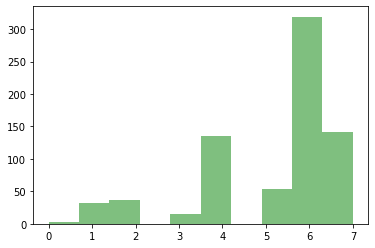

In [50]:
cl = [int(x) for x in correct_list]
cl_series = pd.Series(cl)
wl = [int(x) for x in wrong_list]
wl_series = pd.Series(wl)
plt.hist(cl, color = 'g', alpha=0.5)

#plt.hist(wl, color = 'r', alpha=0.5)

<BarContainer object of 8 artists>

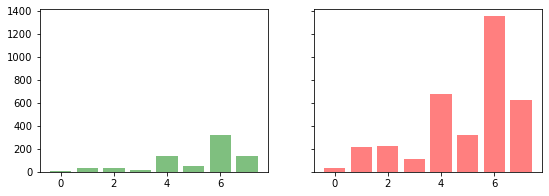

In [56]:
names_c = cl_series.value_counts().index
values_c = cl_series.value_counts().values

names_w = wl_series.value_counts().index
values_w = wl_series.value_counts().values
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

axs[0].bar(names_c,values_c, color = 'g', alpha=0.5)
axs[1].bar(names_w,values_w, color = 'r', alpha=0.5)

In [ ]:
def test(net):
    correct = 0
    total = 0
    realclasslist = []
    predictedClassList = []
    with torch.no_grad():
        for i in range(len(test_X)):
            #print("test_y[i] \n", test_y[i], "\noutput y =", net(test_X[i]))
            real_class = torch.argmax(test_y[i]).to(device)
            realclasslist.append(test_y[i])
            net_out = net(test_X[i]).to(device)  # returns a list, 
            predictedClassList.append(net_out.tolist())
            #print(net_out)
            predicted_class = torch.argmax(net_out)
            #print("predicted_class = ", predicted_class,"\nreal class = ", real_class)
            
            #print(predicted_class)
            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))
    return (predictedClassList, realclasslist)

In [ ]:
#Test for indexed win only


def test(net):
    correct = 0
    total = 0
    realclasslist = []
    predictedClassList = []
    with torch.no_grad():
        for i in range(len(test_X)):
            #print("test_y[i] \n", test_y[i], "\noutput y =", net(test_X[i]))
            real_class = test_y[i]
            #print(real_class)
            realclasslist.append(test_y[i])
            net_out = net(test_X[i]).to(device)  # returns a list, 
            predictedClassList.append(net_out.tolist())
            #print(net_out)
            predicted_class = torch.argmax(net_out)
            #print("predicted_class = ", predicted_class,"\nreal class = ", real_class)
            
            #print(predicted_class)
            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))
    return (predictedClassList, realclasslist)

TypeError: forward() missing 1 required positional argument: 'x'

In [ ]:
winners = [i.item() for i in Y_wi]
from collections import Counter
  
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
    
List = winners
print(most_frequent(List))

4


In [ ]:
#TESTing
m = nn.LogSoftmax(dim = 1)

In [ ]:
for i in range(1000):
    print(torch.argmax(net(test_X)[i]))

tensor(6, device='cuda:0')
tensor(5, device='cuda:0')
tensor(6, device='cuda:0')
tensor(5, device='cuda:0')
tensor(4, device='cuda:0')
tensor(6, device='cuda:0')
tensor(6, device='cuda:0')
tensor(5, device='cuda:0')
tensor(6, device='cuda:0')
tensor(4, device='cuda:0')
tensor(6, device='cuda:0')
tensor(6, device='cuda:0')
tensor(5, device='cuda:0')
tensor(6, device='cuda:0')
tensor(7, device='cuda:0')
tensor(6, device='cuda:0')
tensor(7, device='cuda:0')
tensor(7, device='cuda:0')
tensor(6, device='cuda:0')
tensor(5, device='cuda:0')
tensor(1, device='cuda:0')
tensor(5, device='cuda:0')
tensor(5, device='cuda:0')
tensor(5, device='cuda:0')
tensor(5, device='cuda:0')
tensor(5, device='cuda:0')
tensor(6, device='cuda:0')
tensor(6, device='cuda:0')
tensor(6, device='cuda:0')
tensor(7, device='cuda:0')
tensor(6, device='cuda:0')
tensor(6, device='cuda:0')
tensor(5, device='cuda:0')
tensor(5, device='cuda:0')
tensor(6, device='cuda:0')
tensor(7, device='cuda:0')
tensor(6, device='cuda:0')
t

In [ ]:
from torchvision import transforms, datasets

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

  6%|▋         | 626688/9912422 [00:00<00:01, 6266602.10it/s]

9913344it [00:01, 6792260.79it/s]                             


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



29696it [00:00, 14847306.18it/s]         

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




 36%|███▌      | 586752/1648877 [00:00<00:00, 5831211.73it/s]

1649664it [00:00, 6439105.49it/s]                             


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



5120it [00:00, ?it/s]                   

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw

Processing...



C:\Users\Nick\.conda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)
testset


In [ ]:
for data in testset:
    x,y = data
    print(x,y)
    print(len(x))
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.